In [217]:
import pandas as pd
import numpy as np
import risk_kit as rk
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
ind = pd.read_csv('data/ind30_m_vw_rets.csv', header=0, index_col=0, parse_dates=True)/100
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [181]:
ind.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [182]:
ind.index = pd.to_datetime(ind.index, format='%Y%m').to_period('M')

In [183]:
ind.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [184]:
ind.columns = ind.columns.str.strip()

In [185]:
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [186]:
ind = rk.get_ind_returns()
ind.head(2)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676


In [187]:
ind.shape

(1110, 30)

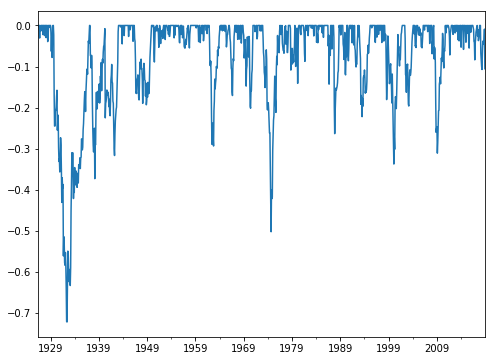

In [188]:
rk.compute_drawdown(ind.Food)['Drawdowns'].plot.line(figsize=(8, 6))
plt.show()

In [189]:
cols_to_select = ['Food', 'Beer', "Fin"]
rk.var_gaussian(ind[cols_to_select], modified=True)

Food    0.016007
Beer    0.049466
Fin     0.026677
dtype: float64

In [190]:
rk.var_gaussian(ind, modified=True).sort_values().head()

Telcm    0.011199
Mines    0.013879
Meals    0.014235
Oil      0.014735
Smoke    0.015141
dtype: float64

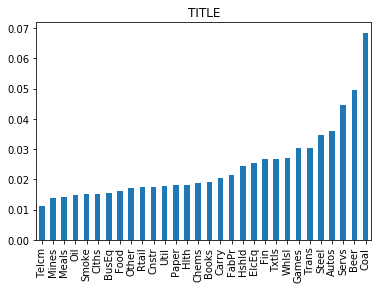

In [191]:
rk.var_gaussian(ind, modified=True).sort_values().plot.bar(title="TITLE")
plt.show()

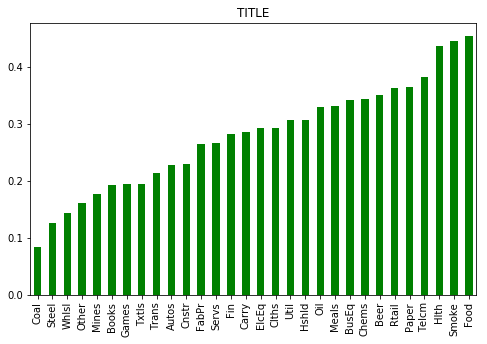

In [192]:
rk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="TITLE", color='green', figsize=(8, 5))
plt.show()

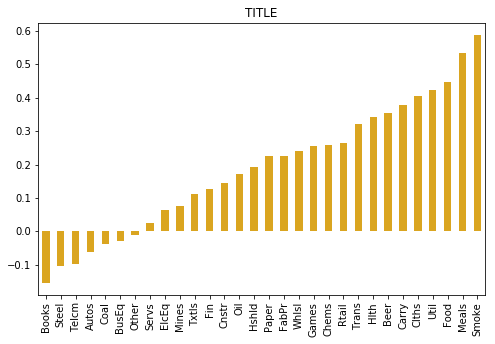

In [193]:
rk.sharpe_ratio(ind['2000':], 0.03, 12).sort_values().plot.bar(title="TITLE", color='goldenrod', figsize=(8, 5))
plt.show()

## Returns and Covariance matrix

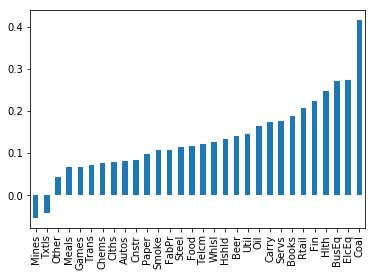

In [194]:
ind = rk.get_ind_returns()
er = rk.annualize_ret(ind['1996':'2000'], 12)
er.sort_values().plot.bar()

In [195]:
cov = ind['1996':'2000'].cov()

In [196]:
cov.shape

(30, 30)

In [197]:
def portfolio_return(weights, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns 

def portfolio_vol(weights, covmat):
    """
    Weights -> Vol
    """
    return (weights.T @ covmat @ weights) ** 0.5

In [198]:
l = ['Food', 'Smoke', 'Beer', 'Coal']

In [199]:
er[l]

Food     0.116799
Smoke    0.107830
Beer     0.141126
Coal     0.414689
dtype: float64

In [200]:
cov.loc[l, l]

,Food,Smoke,Beer,Coal
Food,0.002609,0.002061,0.002379,0.000027
Smoke,0.002061,0.008349,0.001359,-0.000733
Beer,0.002379,0.001359,0.005264,0.001728
Coal,0.000027,-0.000733,0.001728,0.018641


In [201]:
weights = np.repeat(1/4, 4)

In [202]:
weights

array([0.25, 0.25, 0.25, 0.25])

In [203]:
rk.portfolio_return(weights, er[l])

0.19511097196038385

In [204]:
rk.portfolio_vol(weights, cov.loc[l,l])

0.05505919577643704

## 2 Asset Frontier

In [205]:
l = ['Food', 'Fin']
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

In [206]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [207]:
l

['Food', 'Fin']

In [208]:
rets = [rk.portfolio_return(w, er[l]) for w in weights]

In [209]:
len(rets)

20

In [210]:
vols = [rk.portfolio_vol(w, cov.loc[l, l]) for w in weights]

In [211]:
vols

[0.0630997295785121,
 0.06158993523633357,
 0.06014945218410906,
 0.058783376049520435,
 0.057497010597147534,
 0.056295820284777004,
 0.055185367277581616,
 0.05417123191958527,
 0.05325891662348817,
 0.052453734454546576,
 0.05176068529923807,
 0.051184324291365664,
 0.05072862889709186,
 0.05039687244752686,
 0.050191512642118824,
 0.050114103366356924,
 0.05016523693975831,
 0.05034452169132733,
 0.05065059681319872,
 0.051081183197300324]

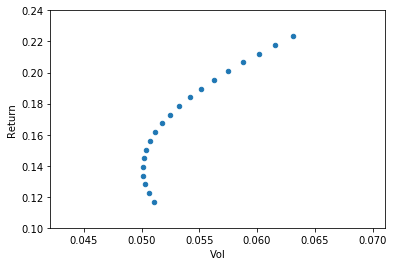

In [212]:
ef = pd.DataFrame({"Return": rets, "Vol": vols})
ef.plot.scatter(x='Vol', y='Return')
plt.show()

In [213]:
l = ['Fin', 'Beer']

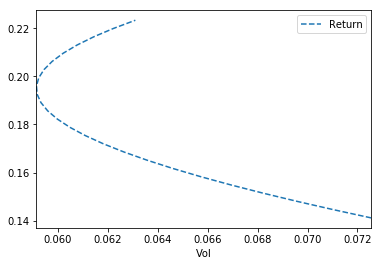

In [214]:
rk.plot_ef2(25, er[l], cov.loc[l,l], '--')

### N-asset case

In [247]:
l = ['Games', 'Fin', 'Beer']

In [248]:
w15 = rk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol15 = rk.portfolio_vol(w15, cov.loc[l,l])

In [249]:
w15

array([0.33928145, 0.4086862 , 0.25203236])

In [250]:
vol15

0.053514187175001254

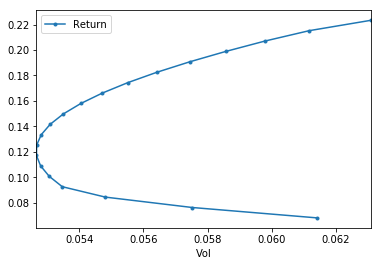

In [262]:
rk.plot_ef(20, er[l], cov.loc[l,l])

### Finding the Max Sharpe Ratio Portfolio

In [269]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import risk_kit as rk

ind = rk.get_ind_returns()
er = rk.annualize_ret(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [270]:
from scipy.optimize import minimize

def msr(riskfree_rate, er, cov):
    #from scipy.optimize import minimize
    """
    RiskFree rate, ER, Cov -> weights vector
    """
  
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    
    
    weights_sum_to_1 = {
        'type' : 'eq',
        'fun' : lambda weights: np.sum(weights) - 1
    }
    
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio, given weights
        """
        r = rk.portfolio_return(weights, er)
        vol = rk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
        
    
    results = minimize(neg_sharpe_ratio, init_guess, 
                       args=(riskfree_rate, er, cov,), method="SLSQP", 
                       options={'disp' : False}, 
                       constraints=(weights_sum_to_1), 
                       bounds=bounds
                      )
    
    return results.x

AttributeError: 'NoneType' object has no attribute 'set_xlim'

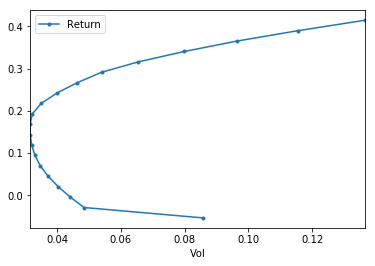

In [268]:
ax = rk.plot_ef(20, er, cov)
ax.set_xlim(left=0)
rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = rk.portfolio_return(w_msr, er)
vol_msr = rk.portfolio_vol(w_msr, cov)
# Add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color='green', 
        marker='o', linestyle='dashed')
plt.show()

In [246]:
rk.minimize_vol(0.15, er[l], cov.loc[l,l])

array([0.33928145, 0.4086862 , 0.25203236])

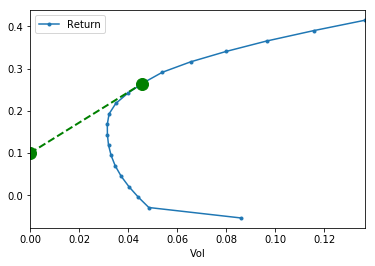

In [274]:
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)
plt.show()

### Lack of Robustness and Global Min Variance (GMV) portfolio

In [286]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import risk_kit as rk

ind = rk.get_ind_returns()
er = rk.annualize_ret(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [287]:
l = ['Food', 'Steel']

In [288]:
rk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040363, 0.24959637])

In [289]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [290]:
rk.msr(0.1, np.array([0.11, 0.12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

In [291]:
rk.msr(0.1, np.array([0.10, 0.13]), cov.loc[l,l])

array([0., 1.])

In [292]:
rk.msr(0.1, np.array([0.13, 0.10]), cov.loc[l,l])

array([1., 0.])

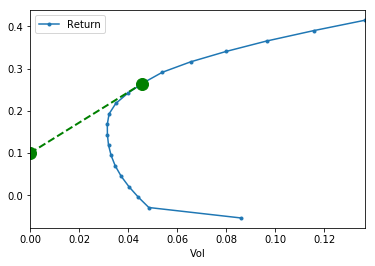

In [293]:
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

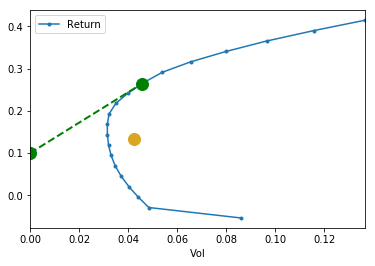

In [297]:
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)

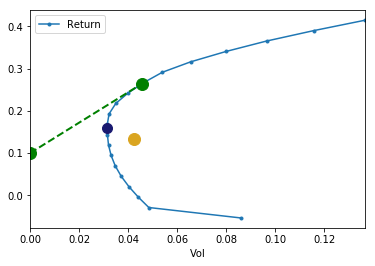

In [300]:
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, 
           show_ew=True, show_gmv=True)